In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.optimize import curve_fit
from statistics import mean, median, mode, stdev, variance

from numpy import average
import math

Mean:  233.35546875
Standard Deviation:  15.265733814988012
Compensated Std. Dev:  15.273193250475922
Std. dev. of mean:  0.4770541817183754
Theoretical Std. dev.: 
[184.     184.0001 184.0002 ... 287.9997 287.9998 287.9999]
[ 26.15689714 233.28281892  15.79107474]
[0.20069174 0.20069571 0.20069967 ... 0.06462353 0.06462211 0.06462069]


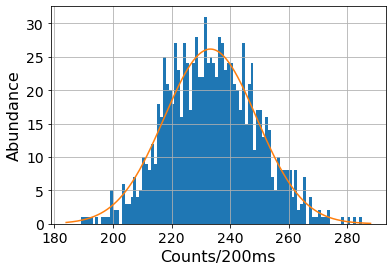

In [4]:
source = 'Lab2Part1.csv'
#csv.reader(source)

file = open(source)
#print(file)

csvreader = csv.reader(file)
#print(csvreader)

data = pd.read_csv(source)
channel_float = [float(x) for x in data['Channel']]
counts_float = [float(x) for x in data['Counts']]

#print(np.min(counts_float), np.max(counts_float))
bins = np.arange(np.min(counts_float)-5, np.max(counts_float)+4, 1)
#print(len(bins))

hist = plt.hist(counts_float, bins=bins)
binwidth = (hist[1][1]-hist[1][0])/2.

x = hist[1][:-1]+binwidth
y = hist[0]
#print(bins)

#sum_weight = np.sum(weight)
#print(weight)

#M_array = [x for x in weight if x >= 1]
#M = len(M_array)

print('Mean: ', mean(counts_float))
print('Standard Deviation: ', stdev(counts_float))
print('Compensated Std. Dev: ', math.sqrt((stdev(counts_float)**2)*1024/1023))
print('Std. dev. of mean: ', stdev(counts_float)/math.sqrt(1024))
print('Theoretical Std. dev.: ', )

x0 = np.arange(np.min(counts_float)-5, np.max(counts_float)+4, 0.0001)
print(x0)
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, x, y, p0 = [30, 240, 5])
print(popt)

print(gauss_function(x0, *popt))
#plot the fit results
plt.plot(x0,gauss_function(x0, *popt))
#plt.plot(x0, gauss_function(x0, x, y, p0 = (1,0,5)), label = 'Gaussian Fit for the Photoionization Peak')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Counts/200ms', fontsize = 16)
plt.ylabel('Abundance', fontsize = 16)

plt.grid()
plt.savefig('baseline_histogram_gaussian_one.png', bbox_inches='tight')

Variance:  215.95964814487166
Standard Dev.: 14.695565594589127
Std. dev. of mean:  1.632840621621014


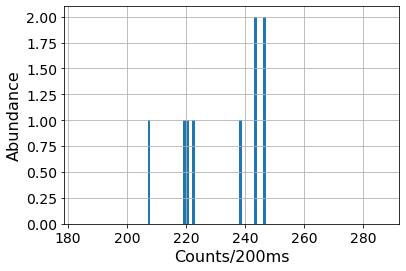

In [4]:
#Now to select a random selection of 9 data points and running statistical measurements with these.

subset = [counts_float[305], counts_float[772], counts_float[562], counts_float[277], counts_float[6], counts_float[505], 
          counts_float[740], counts_float[64], counts_float[34]]

#Taking the Poisson Errors
a = [math.sqrt(x) for x in subset]
#Now finding the weights from the Poisson Errors
weights = [1/x for x in a]

#The numerator and denominator to find the weighted avergae and standard deviation
numerator = sum([subset[i]*weights[i] for i in range(len(subset))])
denominator = sum(weights)
   
weighted_average = round(numerator/denominator,2)

b = [(x - weighted_average)**2 for x in subset]

c = [weights[i]*b[i] for i in range(len(b))]
d = np.sum(c)

print('Variance: ', (d*9)/(denominator*8))
print('Standard Dev.:', math.sqrt((d*9)/(denominator*8)))
print('Std. dev. of mean: ', math.sqrt((d*9)/(denominator*8))/9)

#Plotting the histogram for the subset of data
plt.hist(subset, bins=bins)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Counts/200ms', fontsize = 16)
plt.ylabel('Abundance', fontsize = 16)

plt.grid()
#plt.savefig('baseline_histogram_gaussian_subset.png', bbox_inches='tight')

[40185.25325972   128.32294034   225.19584962]
80
[-4.48020154e-03  1.06096402e+01]


<ipython-input-10-ee4ead1919c4>:26: RuntimeWarning: invalid value encountered in log
  counts_minus_background = [np.log(x-popt[1]) for x in counts_float]


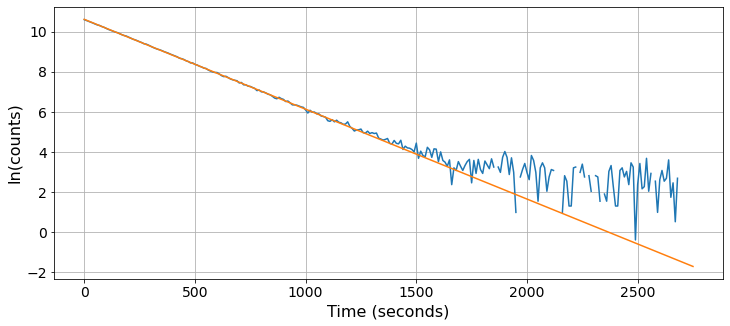

In [10]:
source = 'Lab2Part2.csv'
#csv.reader(source)

file = open(source)
#print(file)

csvreader = csv.reader(file)
#print(csvreader)
x = np.arange(0, 2750, 0.01)

data = pd.read_csv(source)
channel_float = [float(x) for x in data['Channel']]
time = [x*10 for x in channel_float]
#print(time)
counts_float = [float(x) for x in data['Counts']]

def exp_function(x, A, B, tau):
    return (B + A*np.exp(-x/tau))

def linear(x, m, b):
    return(m*x + b)

popt, pcov = curve_fit(exp_function, time, counts_float, p0 = [40000, 50, 20])
print(popt)

counts_minus_background = [np.log(x-popt[1]) for x in counts_float]
counts = [x for x in counts_minus_background if x >= 7]
print(len(counts))

popt, pcov = curve_fit(linear, np.arange(0, 800, 10), counts, p0 = [-1, 11])
print(popt)

figure = plt.figure(figsize = [12, 5])
#plt.plot(time, counts_float, linewidth = 4)
#plt.plot(x, exp_function(x, popt[0], popt[1], popt[2]))
plt.plot(time, counts_minus_background)
plt.plot(x, linear(x, popt[0], popt[1]), label = 'Slope = 10.55')
plt.grid()
plt.xlabel('Time (seconds)', fontsize = 16)
plt.ylabel('ln(counts)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#plt.legend()
#print(popt[1]*10)
plt.savefig('linear_fit.png', bbox_inches='tight')